In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# 머신러닝 단계 Pipe Line
1. 데이터 로드
2. 모델 학습
3. 예측과 평가하기

# 평가
* 분류모델에서 평가 : 정확도(Accuracy)와 오차행렬(Confusion Matrix)를 살펴보자

# Bagging 알고리즘
- Bootstrap Aggregation의 약자
- RandomForest 모델에서 사용하는 대표적인 알고리즘
    - sample추출은 bootstrap 방법으로 가져오고, 최종적으로 결과를 예측하는 방법을 aggregation으로 한다

# 실습


In [6]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [51]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

In [52]:
# RandomForeset 모델 생성
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [53]:
# 모델 훈련
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
# 모델 예측
pred = rf_clf.predict(X_test)

In [55]:
# accuracy
accuracy = accuracy_score(y_test, pred)
accuracy

0.9666666666666667

# Confusion Matrix
- 성능지표에서 잘 활용하고 있는 오차행렬은 학습을 끝낸 모델이 예측을 수행하면서 얼마나 혼란스러워하는지를 보여주는 행렬

In [38]:
y_true = [2,0,2,2,0,1] # 실제 정답
y_pred = [0,0,2,2,0,2] # 예측 결과
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [43]:
a = ['c', 'a', 'a', 'b', 'c'] # label
b = ['b', 'b', 'a', 'b', 'c'] # prediction
confusion_matrix(a,b)

array([[1, 1, 0],
       [0, 1, 0],
       [0, 1, 1]], dtype=int64)

In [44]:
a = ['c', 'a', 'a', 'b', 'c'] # label
b = ['b', 'b','a', 'b', 'c'] # prediction
confusion_matrix(a,b, labels=['c', 'a','b'])

array([[1, 0, 1],
       [0, 1, 1],
       [0, 0, 1]], dtype=int64)

In [33]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [56]:
cm = pd.DataFrame(confusion_matrix(y_test, pred), columns=iris.target_names, index=iris.target_names)
cm

,setosa,versicolor,virginica
setosa,12,0,0
versicolor,0,8,0
virginica,0,1,9


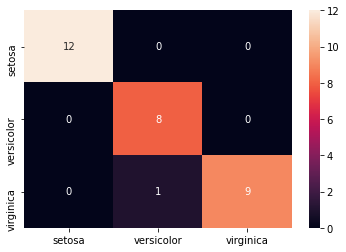

In [59]:
sns.heatmap(cm, annot=True, cbar=True, color='blue')
plt.show()